In [112]:
# First, load any modules you need here.

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as colors

import scipy.linalg as scipy_linalg

import scipy.optimize as optimize

import scipy.integrate as integrate

import scipy.stats as scipy_stats

import scipy.special as special

## Hypothesis testing and P-value

<h3>

The rest of the semester, we're going to look more at some statistics.  

We often have some data and we want to see if we have a result that is significant.  We call this hypothesis testing.

For example, we may give paitents a drug to see if they live longer.  (We propably also want to know how much longer, but first we just want to see if there is any effect.)

We might have a correlation between exposure to a chemical and cancer rates, and we want to know is that correlation significant?

We might give students a pre- and post- test to see if they learned anything in a class.  Are the score different?


We've seen some of this already, when we talked about linear fitting and function fitting, and about how good a fit was.  Also a little when comparing different fits.  But let's take a look where we really just want to test a hypothesis.  We'll start with a coin.  We want to figure out if the coin is fair or biased.

In this case, our null hypothesis is that the coin if fair, the probability of being heads is $p=0.5$.  We can test this against an alternate hypothesis that $p \ne 0.5$.

We was before that coin flips will follow what's called a binomial distribution - each flip is a random trial with probability $p$ of producing a head.  So for n flips, the probability of getting X number of heads is Binomial(n,p):
    
</h3>

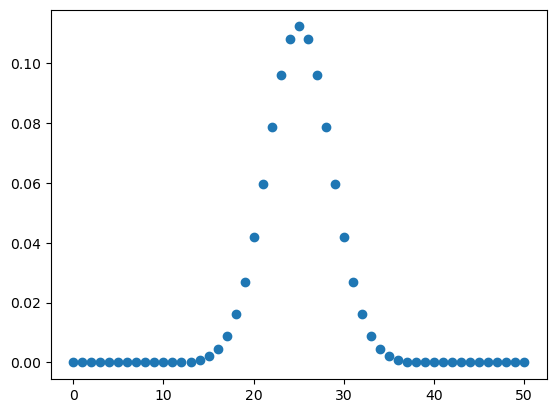

In [113]:
# Example of a binomial distribution:

n = 50

p=0.5

x = np.arange(n+1)

y1 = scipy_stats.binom.pmf(x,n,p)

p = 0.4

y2 = scipy_stats.binom.pmf(x,n,p)


plt.plot(x,y1,'o')
#plt.plot(x,y2,'o')
#plt.yscale('log')
plt.show()




<h3>

This looks very close to a normal Gaussian distribution with an average of $mu = p$ and a standard deviation of $sigma = \sqrt{p*(1-p)*n}$.

</h3>



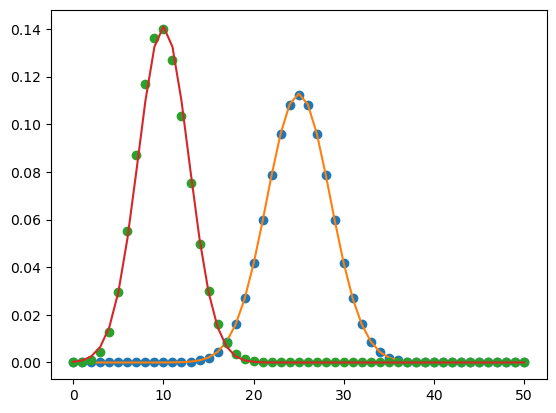

In [114]:
def normal_approximation_to_binomial(n,p):
    mu = p * n
    sigma = np.sqrt(p * (1-p) * n)
    return(mu,sigma)

def normal(x,mu,sigma):
    norm = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2))
    return(norm)

n = 50

p = 0.5

x = np.arange(n+1)

y1 = scipy_stats.binom.pmf(x,n,p)


mu,sigma = normal_approximation_to_binomial(n,p)

#norm_y1 = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2))
norm_y1 = normal(x,mu,sigma)


p = 0.2

y2 = scipy_stats.binom.pmf(x,n,p)

mu,sigma = normal_approximation_to_binomial(n,p)

#norm_y2 = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2))
norm_y2 = normal(x,mu,sigma)


plt.plot(x,y1,'o')
plt.plot(x,norm_y1)
plt.plot(x,y2,'o')
plt.plot(x,norm_y2)
#plt.yscale('log')
plt.show()



<h3>

Doesn't look to bad.  we'll need the cumulative distribution functions as well.  For a normal distrubtions we ca ndefine this.  For the binomial distribution we'll use the built-in CDF.

For a given location, the CDF tells us what fraction of the function is at or below that value.

</h3>

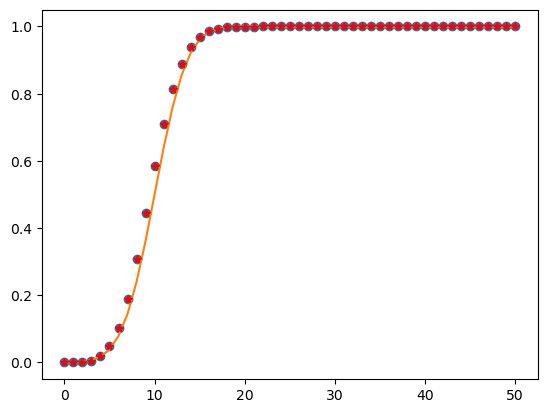

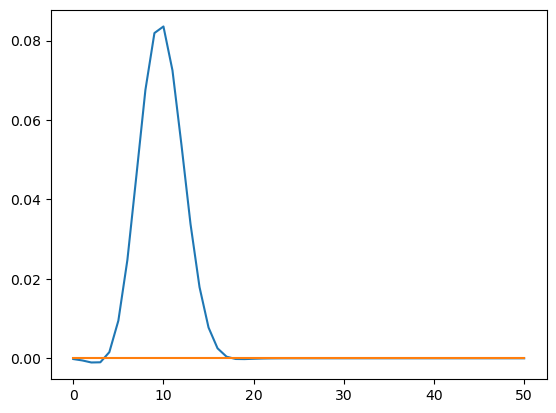

In [115]:
# Need cumulative distribution functions:

def normal_cdf(x,mu,sigma):
    cdf = (1 + special.erf((x - mu) / (np.sqrt(2) * sigma))) / 2.
    return(cdf)

# Normal approximiation
norm_cdf_y2 = normal_cdf(x,mu,sigma)

# Using build-in function:
cdf_y2 = scipy_stats.binom.cdf(x,n,p)

# We could also do this by addinf up the dsitribution by hand:
by_hand_cdf = np.cumsum(y2)

plt.plot(cdf_y2,'o')
plt.plot(norm_cdf_y2)
plt.plot(by_hand_cdf,'r*')
plt.show()

plt.plot(cdf_y2-norm_cdf_y2)
plt.plot(cdf_y2-by_hand_cdf)
plt.show()


<h3>

Now we can use the CDF to find the below of above some threshold or in some interval.

The CDF is the probability the variable is below a given threshold.
    
</h3>

In [119]:
def prob_below(lo,n,p):
    return(scipy_stats.binom.cdf(lo,n,p))

# if not below, it's above.
def prob_above(lo,n,p):
    return(1-prob_below(lo,n,p))

# probabilty in interval
def prob_between(lo,hi,n,p):
    return(scipy_stats.binom.cdf(hi,n,p) - scipy_stats.binom.cdf(lo,n,p))

# probability outside interval
def prob_outside(lo,hi,n,p):
    return(1-prob_between(lo,hi,n,p))

print('n,p = ',n,p)
print('prob_between(8,12,n,p) = ',prob_between(8,12,n,p))

# Also set up the inverse of the CDF.  This finds the value for a given probability.
# Also called the PPF - percent point function

# Here prob (or more) fraction is below the returned value
def upper_bound(prob,n,p):
    return(scipy_stats.binom.ppf(prob,n,p))

# 1-prob (or more) fraction is below the given value
def lower_bound(prob,n,p):
    return(scipy_stats.binom.ppf(1-prob,n,p)-1)

print('upper_bound(0.99,n,p) = ',upper_bound(0.99,n,p))
print('upper_bound(0.01,n,p) = ',upper_bound(0.01,n,p))
print('lower_bound(0.99,n,p) = ',lower_bound(0.99,n,p))
print(x[4],cdf_y2[4])

# At least (1-prob)/2 is in the tail outside the two bounds
def two_sided_bounds_outer(prob,n,p):
    tail_probability = (1-prob)/2
    upper = lower_bound(tail_probability,n,p)
    lower = upper_bound(tail_probability,n,p)
    return(lower,upper)

def two_sided_bounds(prob,n,p):
    tail_probability = (1-prob)/2
    upper = lower_bound(tail_probability,n,p)+1
    lower = upper_bound(tail_probability,n,p)-1
    return(lower,upper)


print('Two-sidede bound for prob=0.9 are ',two_sided_bounds(.9,n,p))
print('Values are ',cdf_y2[5],cdf_y2[15])
print('probability between = ',cdf_y2[15]-cdf_y2[5])

n,p =  50 0.2
prob_between(8,12,n,p) =  0.5066113787815469
upper_bound(0.99,n,p) =  17.0
upper_bound(0.01,n,p) =  4.0
lower_bound(0.99,n,p) =  3.0
4 0.018496015060209363
Two-sidede bound for prob=0.9 are  (5.0, 15.0)
Values are  0.04802721937073366 0.9691965772179523
probability between =  0.9211693578472187


## Coin flip examples

<h3>

Now let look at determining if a coin is fair.

First, let's say we do 1,000 coin flips.  What is the range of outcomes for head we expect?   What bound can we put so that only 5% or outcomes are outside those bounds?
    
</h3>

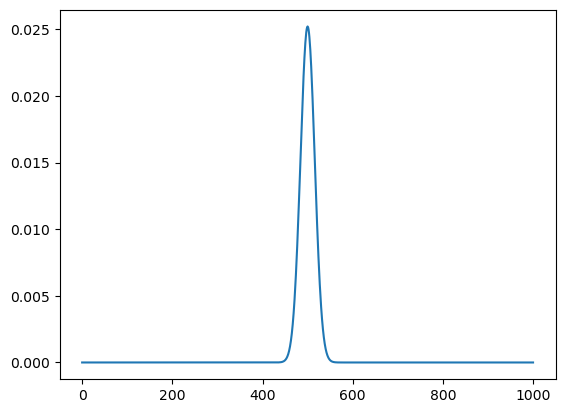

The bounds are 468 531
Values are  0.023145598680249003 0.976854401319751
Ranger between values is  0.953708802639502


In [125]:
n = 1000

p = 0.5

x = np.arange(n+1)

y50 = scipy_stats.binom.pmf(x,n,p)

cdf_y50 = scipy_stats.binom.cdf(x,n,p)

plt.plot(x,y50)
plt.show()


# What is the 95% range for outcomes?

lower,upper = two_sided_bounds(.95,n,p)
lower50 = int(lower)
upper50 = int(upper)

print('The bounds are',lower50,upper50)
print('Values are ',cdf_y50[lower50],cdf_y50[upper50])
print('Ranger between values is ',cdf_y50[upper50]-cdf_y50[lower50])
#print('One step lower and high, values are ',cdf_y[lower-1],cdf_y[upper+1])


<h3>

Only about 5% of the time do you have less 486 heads or more than 531.

Now we want to see what happens if our coin is biased.  Let's say our coin come up heads 55% of the time.  What does the distribution look like?
    
</h3>

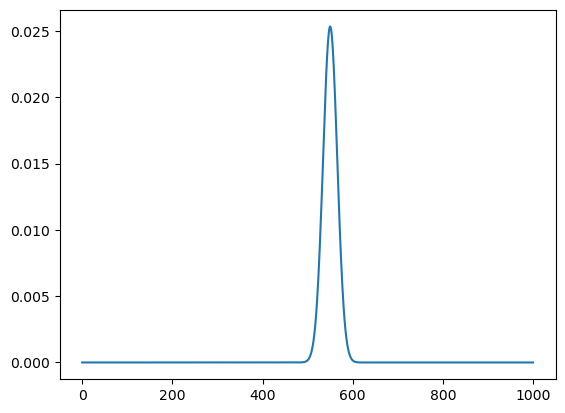

The bounds are 518 581
Values are  0.02277177668344545 0.9775713230973402
Ranger between values is  0.9547995464138948
 
Probability the 55% coin looks fair =  0.11988283650568078
Probability the coin is rejected as not fiar =  0.8801171634943192


In [131]:
p = 0.55

y55 = scipy_stats.binom.pmf(x,n,p)

cdf_y55 = scipy_stats.binom.cdf(x,n,p)

plt.plot(x,y55)
plt.show()


# What is the 95% range for outcomes?

lower,upper = two_sided_bounds(.95,n,p)
lower55 = int(lower)
upper55 = int(upper)

print('The bounds are',lower55,upper55)
print('Values are ',cdf_y55[lower55],cdf_y55[upper55])
print('Ranger between values is ',cdf_y55[upper55]-cdf_y55[lower55])
#print('One step lower and high, values are ',cdf_y[lower-1],cdf_y[upper+1])

print(' ')

# How often will the biased coin fall in the 95% range of the fair coin?

prob_looks_fair = prob_between(lower50,upper50,n,p)

print('Probability the 55% coin looks fair = ',prob_looks_fair)
print('Probability the coin is rejected as not fiar = ',1-prob_looks_fair)


<h3>

So there's about an 88% change that a coin with a 55% heads probability will look unfiar after 1000 flips, compared to only 5% for a fiar coin.

    
</h3>

## P-value

<h3>

What we want to do now is say we see a certain number of heads.  What is the probability that the coin is fair?  This is called the p-value.

You are often looking for a p-value < 0.05 or < 0.01 to reject a null hypothesis

Keep in mind, if you do 20 trials, you should get 1 with a p-value < 0.05.  This diesn't mean you found something - it means you p-value isn't high enough.  Called p-hacking.
    
</h3>

In [172]:
# 

def two_sided_p_value(x,n,p):
    if x >= p:
        # value is greater than the mean
        return(2 * prob_above(x,n,p))
    else:
        return(2 * prob_below(x,n,p))

# for 530 heads:

print('530 p-value =',two_sided_p_value(529.5,1000,0.5))

# Use 529.5 to get probabilty of at east 530 heads showing up.


# for 540 heads:

print('540 p-value =',two_sided_p_value(539.5,1000,0.5))


# for 532 heads puts you at p < 0.05:

print('532 p-value =',two_sided_p_value(531.5,1000,0.5))


# for 542 heads, p<0.01 :

print('542 p-value =',two_sided_p_value(541.5,1000,0.5))



# for 553 heads, p<0.001 :

print('553 p-value =',two_sided_p_value(552.5,1000,0.5))


530 p-value = 0.062023195098363404
540 p-value = 0.01244414627717183
532 p-value = 0.046291197360498026
542 p-value = 0.008639949002260394
553 p-value = 0.000889985964769302


## Confidence Interval

<h3>

We can also turn this around - for a given number of heads we observe in a given number of flips, what is the range values for the probability of hte coin being heads to we get?

This is called the confidence interval.  Usually we want something like the 95% or 99% confidence interval.

Let's set this up.

The easiest thing to do is approximate our distribution as a gaussian, and then the confidence interval is easy.

Our probability is assumed to be head over flips, which is mu in our Gaussian, and our width sigma is $\sqrt{p(1-p)/n}$

We can do a little better (maybe?) using the full binomial distribution.  We assume p is head/n, and find the confidence interval from out two-sided bounds:
    
</h3>

In [173]:
# Calculate confidence interval:

# For 530 heads:

heads = 530

confidence_interval = two_sided_bounds(0.95,n,heads/n)
confidence_interval99 = two_sided_bounds(0.99,n,heads/n)

print('For',heads,'heads the 95% confidence interval is', confidence_interval)
print('For',heads,'heads the 99% confidence interval is', confidence_interval99)

print(' ')

heads = 540

confidence_interval = two_sided_bounds(0.95,n,heads/n)
confidence_interval99 = two_sided_bounds(0.99,n,heads/n)

print('For',heads,'heads the 95% confidence interval is', confidence_interval)
print('For',heads,'heads the 99% confidence interval is', confidence_interval99)



For 530 heads the 95% confidence interval is (498.0, 561.0)
For 530 heads the 99% confidence interval is (488.0, 571.0)
 
For 540 heads the 95% confidence interval is (508.0, 571.0)
For 540 heads the 99% confidence interval is (498.0, 581.0)


<h3>

530 heads does not rule out a fair coin at the 95% or 99% confidence level.

540 heads does rule out a fiar coin at the 95% level, but not 99% level.  500 (fair) is still in the 99% confidence interval.

    
</h3>